In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import imblearn
print(imblearn.__version__)

0.8.1


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
import warnings

from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



warnings.filterwarnings('ignore')

In [4]:
df_1 = pd.read_csv('Assignment_Data.csv')
df_2 = pd.read_csv('Delivery_Partners_Data.csv')

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132394 entries, 0 to 132393
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ORDER_ID                  132394 non-null  int64  
 1   DE_ID                     132394 non-null  int64  
 2   ASSIGNMENT_START_TIME     132394 non-null  object 
 3   ASSIGNMENT_END_TIME       132394 non-null  object 
 4   reject_ind                132394 non-null  int64  
 5   reject_type               8048 non-null    object 
 6   PLACED_TIME               132394 non-null  object 
 7   DELIVERED_TIME            131782 non-null  object 
 8   LASTMILE_DISTANCE         132384 non-null  float64
 9   FIRSTMILE_DISTANCE        132238 non-null  float64
 10  LAST_MILE_TIME_PREDICTED  132394 non-null  float64
 11  PAYOUT_MADE_TO_DE         132391 non-null  float64
 12  NUM_PING_COUNT_LAST10MIN  132394 non-null  int64  
 13  LAST_PING_TIME_LAST10MIN  132394 non-null  o

In [6]:
df_1.head()

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,451.0,3210.0,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,443.0,2910.0,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,367.3,3210.0,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,413.2,3210.0,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764


In [7]:
df_1.describe()

,ORDER_ID,DE_ID,reject_ind,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
count,132394.000000,1.323940e+05,132394.000000,132384.000000,132238.000000,132394.000000,132391.000000,132394.000000,113853.000000,132394.000000,132394.000000
mean,62266.261303,6.156389e+05,0.060788,432.864177,364.857121,403.579538,2764.807124,24.165408,489.926537,37.389104,72.859044
std,36083.677703,3.801389e+05,0.238942,82.305359,40.211260,53.905507,1277.496520,17.674050,171.226181,0.023136,0.032406
min,1.000000,2.200000e+02,0.000000,320.000000,320.000000,250.000000,0.000000,1.000000,372.000000,37.271775,72.703223
25%,30948.250000,3.338200e+05,0.000000,373.400000,327.500000,361.500000,2110.000000,11.000000,373.000000,37.371754,72.837974
50%,62166.500000,3.862560e+05,0.000000,415.400000,356.600000,399.500000,2610.000000,20.000000,375.000000,37.387886,72.856902
75%,93589.750000,9.462630e+05,0.000000,473.900000,392.600000,440.800000,3260.000000,32.000000,624.000000,37.407065,72.878175
max,124798.000000,1.376302e+06,1.000000,1044.500000,743.000000,642.300000,10410.000000,120.000000,841.000000,37.483737,73.029503


In [8]:
df_2.head()

,DE_ID,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID
0,141533,06:42,37.390427,72.849424,2019-09-20,372
1,235942,08:42,37.372289,72.885341,2020-03-15,372
2,973234,06:42,37.410268,72.853610,2018-12-21,375
3,973473,05:42,37.397067,72.872533,2018-12-21,624
4,1016546,06:42,37.425545,72.895137,2019-01-11,668


In [9]:
df_2.describe()

,DE_ID,DE_HOME_LAT,DE_HOME_LNG,DE_ZONE_ID
count,9.910000e+02,991.000000,991.000000,991.000000
mean,5.796376e+05,37.370223,72.870315,481.927346
std,3.652583e+05,0.411062,0.371806,171.127847
min,2.200000e+02,25.268688,70.910224,372.000000
25%,3.397615e+05,37.368010,72.842075,372.000000
50%,3.849680e+05,37.384765,72.860280,374.000000
75%,9.169750e+05,37.406325,72.881400,624.000000
max,1.376302e+06,38.031204,84.199659,1192.000000


In [10]:
print(df_2.DE_JOINING_DATE.max())
print(df_2.DE_JOINING_DATE.min())

2041-03-02
2018-05-02


In [11]:
df_2['DE_JOINING_DATE'] = pd.to_datetime(df_2['DE_JOINING_DATE'])
df_2['Joining_year'] = df_2['DE_JOINING_DATE'].dt.year
df_2['Joining_year'] = np.where(df_2['Joining_year']> 2021, 2021, df_2['Joining_year'])
df_2['Joining_month'] = df_2['DE_JOINING_DATE'].dt.month
df_2['Joining_day'] = df_2['DE_JOINING_DATE'].dt.day
df_2['DE_JOINING_DATE'] = pd.to_datetime({'year':df_2['Joining_year'],
                                         'month':df_2['Joining_month'],
                                         'day':df_2['Joining_day']})
df_2.DE_JOINING_DATE.max()

Timestamp('2021-03-02 00:00:00')

In [12]:
df_2 = df_2[['DE_ID', 'SHIFT_END_TIME', 'DE_HOME_LAT', 'DE_HOME_LNG',
       'DE_JOINING_DATE', 'DE_ZONE_ID']]

In [13]:
df_3 = pd.merge(df_1,df_2, on = 'DE_ID')
len(df_3)/len(df_1)

1.0

In [14]:
df_3[df_3.DELIVERED_TIME.isnull()].reject_ind.unique()
## This implies that delivery time is null means rejected orders which were cancelled due to DE reject

array([1])

In [15]:
print('No of Orders: ',df_3.ORDER_ID.nunique())
print('Number of rows, columns: ', df_3.shape)
print('Number of Drivers : ',df_3.DE_ID.nunique())
print('Order Rejection% :',100*df_3.reject_ind.sum()/len(df_3) )
print('Cancelled Orders% :', 100*df_3['DELIVERED_TIME'].isnull().sum()/len(df_3) )

No of Orders:  124798
Number of rows, columns:  (132394, 22)
Number of Drivers :  991
Order Rejection% : 6.078825324410472
Cancelled Orders% : 0.462256597731015


### On an average 6% orders are rejected by delivery parteners and 0.46% Don't get delivered, i.e 0.46% orders are cancelled from swiggy due to DE Rejects

In [16]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132394 entries, 0 to 132393
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ORDER_ID                  132394 non-null  int64         
 1   DE_ID                     132394 non-null  int64         
 2   ASSIGNMENT_START_TIME     132394 non-null  object        
 3   ASSIGNMENT_END_TIME       132394 non-null  object        
 4   reject_ind                132394 non-null  int64         
 5   reject_type               8048 non-null    object        
 6   PLACED_TIME               132394 non-null  object        
 7   DELIVERED_TIME            131782 non-null  object        
 8   LASTMILE_DISTANCE         132384 non-null  float64       
 9   FIRSTMILE_DISTANCE        132238 non-null  float64       
 10  LAST_MILE_TIME_PREDICTED  132394 non-null  float64       
 11  PAYOUT_MADE_TO_DE         132391 non-null  float64       
 12  NU

In [17]:
df_3['ASSIGNMENT_START_TIME'] = pd.to_datetime(df_3['ASSIGNMENT_START_TIME'])
df_3['ASSIGNMENT_END_TIME'] = pd.to_datetime(df_3['ASSIGNMENT_END_TIME'])
df_3['PLACED_TIME'] = pd.to_datetime(df_3['PLACED_TIME'])
df_3['DELIVERED_TIME'] = pd.to_datetime(df_3['DELIVERED_TIME'])
df_3['LAST_MILE_TIME_PREDICTED'] = pd.to_datetime(df_3['LAST_MILE_TIME_PREDICTED'])
df_3['LAST_PING_TIME_LAST10MIN'] = pd.to_datetime(df_3['LAST_PING_TIME_LAST10MIN'])

In [18]:
df_3['Placed_Hour'] = df_3['PLACED_TIME'].dt.hour
df_3['Order_time'] = (df_3['DELIVERED_TIME']-df_3['PLACED_TIME'])/pd.Timedelta(minutes=1)

In [19]:
print('data start date:',df_3.ASSIGNMENT_START_TIME.min())
print('data end date:',df_3.ASSIGNMENT_START_TIME.max())

data start date: 2021-02-12 07:44:39
data end date: 2021-03-05 07:41:20


In [ ]:
login time shift end time
shhuft daty of the de
df['shift_day'] = np.where(df['login_tine'])
df['totol_rejection'] = df.groupby(['id','date']).rejection.cumsum() - df['rejection']
df['check'] = 1

order_id.rank


df['totol_rejection'] = df.groupby(['id','date']).check.cumsum() - df['rejection']

In [20]:
df_3['Ping_assignment_time_difference'] =(df_3['ASSIGNMENT_START_TIME']- df_3['LAST_PING_TIME_LAST10MIN'] )/pd.Timedelta(seconds = 1)
df_3['same_zone'] = np.where(df_3['CUSTOMER_ZONE'] == df_3['DE_ZONE_ID'],1,0)
df_3['Days_Since_Joining'] = (df_3['ASSIGNMENT_START_TIME'] - df_3['DE_JOINING_DATE']).dt.days

df_3['assignement_time'] = (df_3['ASSIGNMENT_END_TIME'] - df_3['ASSIGNMENT_START_TIME']) / pd.Timedelta(minutes=1)
df_3['Total_distance_travelled'] = df_3['FIRSTMILE_DISTANCE']+ df_3['LASTMILE_DISTANCE']
df_3['diffrence_home_to_customer'] =df_3['DE_HOME_LAT']*df_3['DE_HOME_LAT'] + df_3['DE_HOME_LNG']*df_3['DE_HOME_LNG'] -df_3['CUSTOMER_LAT']*df_3['CUSTOMER_LAT'] - df_3['CUSTOMER_LNG']*df_3['CUSTOMER_LNG'] 

df_3['diffrence_home_to_customer'] = np.sqrt(df_3['diffrence_home_to_customer'].abs())
df_3['Avg_Order_Time'] = (df_3['DELIVERED_TIME'] - df_3['PLACED_TIME']) / pd.Timedelta(minutes=1)
df_3['weekday'] = df_3['ASSIGNMENT_START_TIME'].dt.dayofweek
df_3[['SHIFT_END_Hour','SHIFT_END_Min']] = df_3['SHIFT_END_TIME'].str.split(':', expand = True)
df_3[['SHIFT_END_Hour','SHIFT_END_Min']] = df_3[['SHIFT_END_Hour','SHIFT_END_Min']].astype(int)

df_3['ASSIGNMENT_START_hour'] = df_3['ASSIGNMENT_START_TIME'].dt.hour
df_3['ASSIGNMENT_START_min'] = df_3['ASSIGNMENT_START_TIME'].dt.minute
df_3['Time_left_in_shift'] = (df_3['SHIFT_END_Hour'] - df_3['ASSIGNMENT_START_hour'])*60 +(df_3['SHIFT_END_Min'] - df_3['ASSIGNMENT_START_min'])




In [21]:
len(df_3[df_3.Days_Since_Joining<0])

53

In [ ]:
#
8th oct - 
9th oct - early morning -> 1 2 3 -> 5 42, 6 42, 
over workigng -> beyond 2 hrs 

In [22]:
df_3.SHIFT_END_TIME.unique()

array(['05:42', '06:42', '01:42', '11:42', '08:42', '00:42'], dtype=object)

In [23]:
#time of assignment
def food_time(x):
    if (x >=7 and x<= 11):
        return 'Breakfast'
    elif(x>11 and x <=15):
        return 'Lunch'
    elif(x>15 and x<=19):
        return 'evening_snacks'
    elif(x>19 and x<=23):
        return 'Dinner'
    else:
        return 'Late_night_snacks'
    
df_3['food_zone'] = df_3['Placed_Hour'].apply(food_time)
100*df_3.groupby('food_zone').ORDER_ID.count()/len(df_3)

food_zone
Breakfast             4.764566
Dinner               23.964832
Late_night_snacks    65.714458
Lunch                 0.118585
evening_snacks        5.437558
Name: ORDER_ID, dtype: float64

## Number of rows are more than number of orders

In [24]:
df_check = df_3.groupby('ORDER_ID').DE_ID.count().reset_index()
list_order_id= df_check[df_check.DE_ID>1].ORDER_ID.unique()
df_check1 = df_3[df_3.ORDER_ID.isin(list_order_id)]

In [25]:
df_check1.reject_type.value_counts()

Type-1    3753
Type-2    1812
Type-3    1447
Type-4     715
Name: reject_type, dtype: int64

In [26]:
reject_order_list = list(df_3[df_3.reject_ind == 1].ORDER_ID.unique())
df_rejected = df_3[df_3.ORDER_ID.isin(reject_order_list)]
df_rejected = df_rejected[df_rejected.reject_ind ==1]
df_accepted = df_3[~df_3.ORDER_ID.isin(reject_order_list)]

In [27]:
print('avg assignment time:', df_rejected['assignement_time'].mean())
print('avg order order time:', df_rejected['Avg_Order_Time'].mean())


avg assignment time: 7.742112125165666
avg order order time: 49.84218844584899


In [28]:
# rejected orders completed time
df_rejected_completed = df_3[df_3.ORDER_ID.isin(reject_order_list)]
df_rejected_completed = df_rejected_completed[df_rejected_completed.reject_ind ==0]
print('avg assignment time:', df_rejected_completed['assignement_time'].mean())
print('avg order order time:', df_rejected_completed['Avg_Order_Time'].mean())


avg assignment time: 29.45900704054381
avg order order time: 47.599537302743485


In [29]:
print('avg assignment time:', df_accepted['assignement_time'].mean())
print('avg order time:', df_accepted['Avg_Order_Time'].mean())

avg assignment time: 29.28042205843578
avg order time: 40.3296889431572


### On an average the Delivery Time for an order is increased by 10 mins if an order is rejected

In [30]:
print(df_3['FIRSTMILE_DISTANCE'].max())
print(df_3['FIRSTMILE_DISTANCE'].min())
print(df_3['FIRSTMILE_DISTANCE'].mean())

743.0
320.0
364.8571212510735


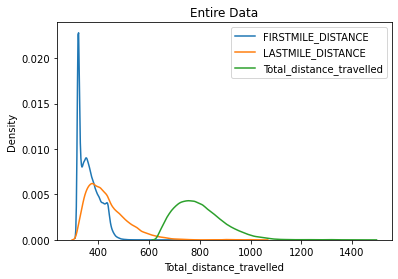

In [31]:
sns.distplot(df_3['FIRSTMILE_DISTANCE'], hist=False, ).set(title='Entire Data')
sns.distplot(df_3['LASTMILE_DISTANCE'], hist = False, )
sns.distplot(df_3['Total_distance_travelled'], hist = False)
plt.legend(['FIRSTMILE_DISTANCE', 'LASTMILE_DISTANCE','Total_distance_travelled'])

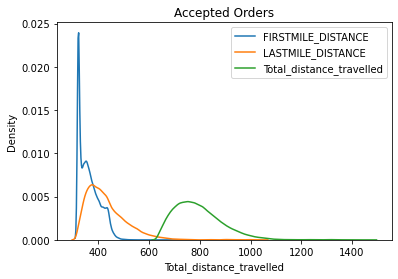

In [32]:
sns.distplot(df_accepted['FIRSTMILE_DISTANCE'], hist=False, ).set(title='Accepted Orders')
sns.distplot(df_accepted['LASTMILE_DISTANCE'], hist = False, )
sns.distplot(df_accepted['Total_distance_travelled'], hist = False)
plt.legend(['FIRSTMILE_DISTANCE', 'LASTMILE_DISTANCE','Total_distance_travelled'])

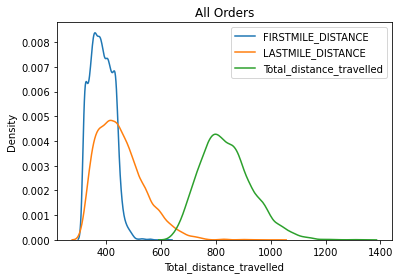

In [33]:
sns.distplot(df_rejected['FIRSTMILE_DISTANCE'], hist=False, ).set(title='All Orders')
sns.distplot(df_rejected['LASTMILE_DISTANCE'], hist = False, )
sns.distplot(df_rejected['Total_distance_travelled'], hist = False)
plt.legend(['FIRSTMILE_DISTANCE', 'LASTMILE_DISTANCE','Total_distance_travelled'])

In [34]:
print('avg first_mile_distance for all orders:', df_3['FIRSTMILE_DISTANCE'].mean() )
print('avg first_mile_distance for accepted orders:', df_accepted['FIRSTMILE_DISTANCE'].mean() )
print('avg first_mile_distance for rejected orders:', df_rejected['FIRSTMILE_DISTANCE'].mean() )
print('\n')
print('avg LASTMILE_DISTANCE for all orders:', df_3['LASTMILE_DISTANCE'].mean() )
print('avg LASTMILE_DISTANCE for accepted orders:', df_accepted['LASTMILE_DISTANCE'].mean() )
print('avg LASTMILE_DISTANCE for rejected orders:', df_rejected['LASTMILE_DISTANCE'].mean() )
print('\n')

print('avg Total_distance_travelled for all orders:', df_3['Total_distance_travelled'].mean() )
print('avg Total_distance_travelled for accepted orders:', df_accepted['Total_distance_travelled'].mean() )
print('avg Total_distance_travelled for rejected orders:', df_rejected['Total_distance_travelled'].mean() )



avg first_mile_distance for all orders: 364.8571212510735
avg first_mile_distance for accepted orders: 363.20837310305006
avg first_mile_distance for rejected orders: 385.5539133691159


avg LASTMILE_DISTANCE for all orders: 432.8641769398092
avg LASTMILE_DISTANCE for accepted orders: 430.6025762917195
avg LASTMILE_DISTANCE for rejected orders: 454.25983086680606


avg Total_distance_travelled for all orders: 797.713921111927
avg Total_distance_travelled for accepted orders: 793.8287200464481
avg Total_distance_travelled for rejected orders: 839.7328173761114


### Hence for rejected orders, the total predicted distance to travel is on average 45 units higher

In [35]:
print('avg NUM_PING_COUNT_LAST10MIN for all orders:', df_3['NUM_PING_COUNT_LAST10MIN'].mean() )
print('avg NUM_PING_COUNT_LAST10MIN for accepted orders:', df_accepted['NUM_PING_COUNT_LAST10MIN'].mean() )
print('avg NUM_PING_COUNT_LAST10MIN for rejected orders:', df_rejected['NUM_PING_COUNT_LAST10MIN'].mean() )

avg NUM_PING_COUNT_LAST10MIN for all orders: 24.165407797936464
avg NUM_PING_COUNT_LAST10MIN for accepted orders: 24.451124909552895
avg NUM_PING_COUNT_LAST10MIN for rejected orders: 20.105740556660038


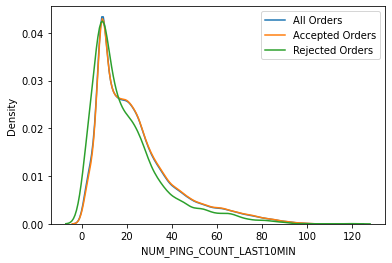

In [36]:
sns.distplot(df_3['NUM_PING_COUNT_LAST10MIN'], hist=False, )
sns.distplot(df_accepted['NUM_PING_COUNT_LAST10MIN'], hist = False, )
sns.distplot(df_rejected['NUM_PING_COUNT_LAST10MIN'], hist = False)
plt.legend(['All Orders', 'Accepted Orders','Rejected Orders'])

In [37]:
print('avg Ping_assignment_time_difference for all orders:', df_3['Ping_assignment_time_difference'].mean() )
print('avg Ping_assignment_time_difference for accepted orders:', df_accepted['Ping_assignment_time_difference'].mean() )
print('avg Ping_assignment_time_difference for rejected orders:', df_rejected['Ping_assignment_time_difference'].mean() )


avg Ping_assignment_time_difference for all orders: 33.17976645467317
avg Ping_assignment_time_difference for accepted orders: 31.388493445740153
avg Ping_assignment_time_difference for rejected orders: 61.010437375745525


In [38]:
### On an average the Ping_assignment_time_difference for rejected orders is around 1 minute

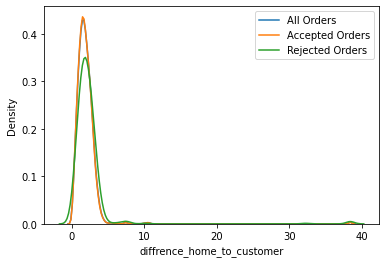

In [39]:
sns.distplot(df_3['diffrence_home_to_customer'], hist=False, )
sns.distplot(df_accepted['diffrence_home_to_customer'], hist = False, )
sns.distplot(df_rejected['diffrence_home_to_customer'], hist = False)
plt.legend(['All Orders', 'Accepted Orders','Rejected Orders'])

### Hence Home to Customer distance doesnt play a major role in rejections, at first look

In [40]:
# weekday
df_check = df_3.groupby(['weekday','reject_ind']).ORDER_ID.count().reset_index()
df_check['ORDER_ID'] = 100*df_check['ORDER_ID']/len(df_3)
df_check

,weekday,reject_ind,ORDER_ID
0,0,0,12.501322
1,0,1,0.759098
2,1,0,12.032267
3,1,1,0.832364
4,2,0,12.916748
5,2,1,0.904120
6,3,0,16.147257
7,3,1,0.951705
8,4,0,14.978775
9,4,1,0.898832


In [41]:
total_orders_on_weekdays = df_3.groupby('weekday').ORDER_ID.count().reset_index()
total_orders_on_weekdays.columns = ['weekday','total_orders']

In [42]:
# weekday
df_check = df_rejected.groupby(['weekday','reject_ind']).ORDER_ID.count().reset_index()
df_check.columns = ['weekday','reject_ind','no_rejected_orders']
df_check = pd.merge(df_check,total_orders_on_weekdays, on = 'weekday')
df_check['%rejection'] = 100*df_check['no_rejected_orders']/df_check['total_orders']
df_check

,weekday,reject_ind,no_rejected_orders,total_orders,%rejection
0,0,1,1005,17556,5.724539
1,1,1,1102,17032,6.470174
2,2,1,1197,18298,6.541699
3,3,1,1260,22638,5.565863
4,4,1,1190,21021,5.661006
5,5,1,1129,17250,6.544928
6,6,1,1165,18599,6.263778


In [43]:

total_orders_foodzone = df_3.groupby('food_zone').ORDER_ID.count().reset_index()
total_orders_foodzone.columns = ['food_zone','total_orders']

df_check = df_rejected.groupby(['food_zone','reject_ind']).ORDER_ID.count().reset_index()
df_check.columns = ['food_zone','reject_ind','no_rejected_orders']
df_check = pd.merge(df_check,total_orders_foodzone, on = 'food_zone')
df_check['%rejection'] = 100*df_check['no_rejected_orders']/df_check['total_orders']
df_check

,food_zone,reject_ind,no_rejected_orders,total_orders,%rejection
0,Breakfast,1,519,6308,8.227647
1,Dinner,1,1700,31728,5.358043
2,Late_night_snacks,1,5350,87002,6.149284
3,Lunch,1,25,157,15.923567
4,evening_snacks,1,454,7199,6.306431


In [44]:
### Although the data for lunch is less, Lunch orders are more likely to be rejected.
### Breakfast orders are also more more likely to be rejected after Lunch

In [45]:
print('avg Time_left_in_shift for all orders:', df_3['Time_left_in_shift'].mean() )
print('avg Time_left_in_shift for accepted orders:', df_accepted['Time_left_in_shift'].mean() )
print('avg Time_left_in_shift for rejected orders:', df_rejected['Time_left_in_shift'].mean() )


avg Time_left_in_shift for all orders: -172.22142997416802
avg Time_left_in_shift for accepted orders: -173.116403318357
avg Time_left_in_shift for rejected orders: -170.6935884691849


In [46]:
print('Distribution of days since joining all orders', df_3['Days_Since_Joining'].mean() )
print('Distribution of days since joining for accepted orders:', df_accepted['Days_Since_Joining'].mean() )
print('Distribution of days since joining for rejected orders:', df_rejected['Days_Since_Joining'].mean() )


Distribution of days since joining all orders 489.84523467830866
Distribution of days since joining for accepted orders: 490.83881905531155
Distribution of days since joining for rejected orders: 473.4541500994036


<AxesSubplot:xlabel='reject_ind', ylabel='Days_Since_Joining'>

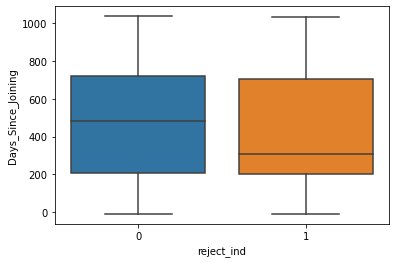

In [47]:
sns.boxplot(y = 'Days_Since_Joining', x = 'reject_ind', data = df_3)
# Hence new drivers are more likely to reject orders , as compared to Experienced Ones

In [48]:
df_3['customer_distance/Time_left_in _shift'] = df_3['diffrence_home_to_customer']/df_3['Time_left_in_shift']

<AxesSubplot:xlabel='reject_ind', ylabel='customer_distance/Time_left_in _shift'>

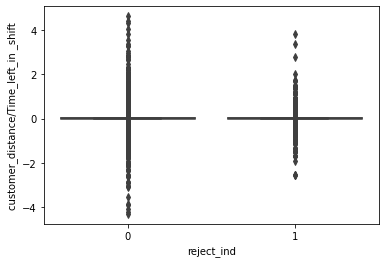

In [49]:
sns.boxplot(y = 'customer_distance/Time_left_in _shift', x = 'reject_ind', data = df_3)


<AxesSubplot:xlabel='reject_ind', ylabel='Total_distance_travelled'>

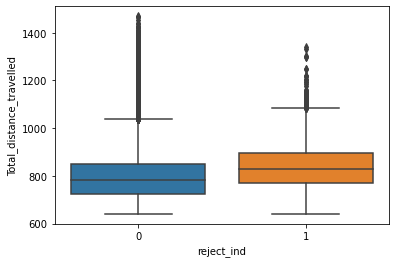

In [50]:
sns.boxplot(y = 'Total_distance_travelled', x = 'reject_ind', data = df_3)
## higher distance travelled leads to More rejections

% orders for different zone all orders 0.5800942640905177
% orders for different zone for accepted orders: 0.5696232352297776
% orders for different zone for rejected orders: 0.6671222664015904


<AxesSubplot:xlabel='reject_ind', ylabel='count'>

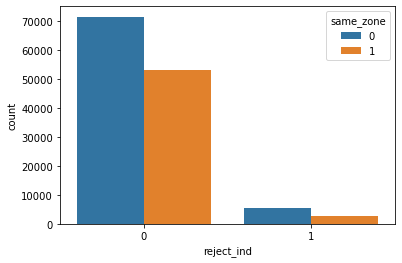

In [51]:
# rejection due to different zone
print('% orders for different zone all orders', 1 - df_3['same_zone'].sum()/len(df_3) )
print('% orders for different zone for accepted orders:', 1 - df_accepted['same_zone'].sum()/len(df_accepted) )
print('% orders for different zone for rejected orders:',1 -  df_rejected['same_zone'].sum()/len(df_rejected) )

sns.countplot(x = "reject_ind", hue = "same_zone", data = df_3)

## if the Zone is Different The rejections is likely to be higher

In [52]:
df_3['Order_date'] = df_3['ASSIGNMENT_START_TIME'].dt.date
df_3 = df_3.sort_values(by = 'ASSIGNMENT_START_TIME')
df_3 = df_3.reset_index(drop = True)
df_3['Total_Order_till_date'] = df_3.groupby(['DE_ID','Order_date']).cumcount()

In [53]:
df_3['Total_rejected_Orders_td'] = df_3.groupby(['DE_ID','Order_date']).reject_ind.cumsum()
df_3['Total_rejected_Orders_td'] = df_3['Total_rejected_Orders_td'].shift(1)
df_3['Total_rejected_Orders_td'] = df_3['Total_rejected_Orders_td'].fillna(0)

<AxesSubplot:>

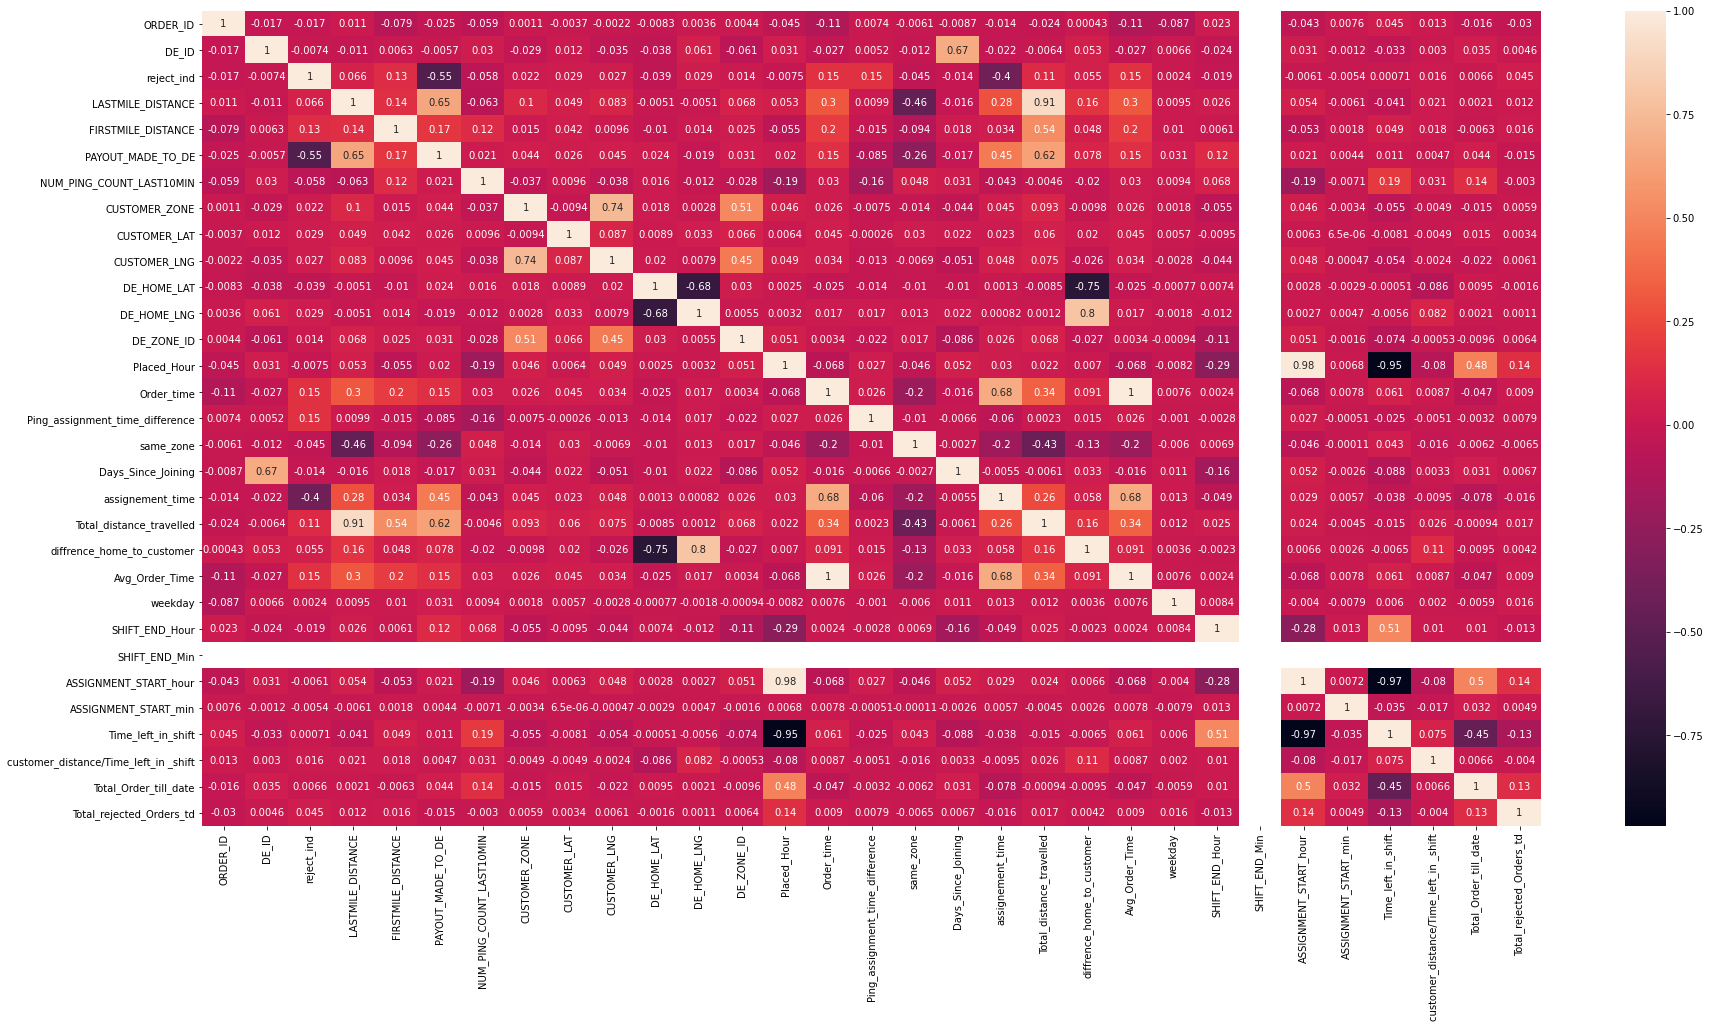

In [54]:
%matplotlib inline
plt.figure(figsize = (30,15))
sns.heatmap(df_3.corr(),annot = True)

In [55]:
# time left in shift is strongly related to assignment time
# same zone is also correlated to last mile distance

### Problem Definatio :- Build an ML model, which gives the probability weather the DE will reject the Order or not before assignment

### Selecting incremental columns for Machine learning model, ones which are available before the assginment of order to DE

### For the Time based columns, like delivery time, assignment time, we take the columns as last_delivery order time, last_order assignement time for given driver on a given day.

In [56]:
df_3.columns

Index(['ORDER_ID', 'DE_ID', 'ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME',
       'reject_ind', 'reject_type', 'PLACED_TIME', 'DELIVERED_TIME',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN',
       'LAST_PING_TIME_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'SHIFT_END_TIME', 'DE_HOME_LAT', 'DE_HOME_LNG',
       'DE_JOINING_DATE', 'DE_ZONE_ID', 'Placed_Hour', 'Order_time',
       'Ping_assignment_time_difference', 'same_zone', 'Days_Since_Joining',
       'assignement_time', 'Total_distance_travelled',
       'diffrence_home_to_customer', 'Avg_Order_Time', 'weekday',
       'SHIFT_END_Hour', 'SHIFT_END_Min', 'ASSIGNMENT_START_hour',
       'ASSIGNMENT_START_min', 'Time_left_in_shift', 'food_zone',
       'customer_distance/Time_left_in _shift', 'Order_date',
       'Total_Order_till_date', 'Total_rejected_Orders_td'],
      dtype='object')

In [57]:
### make columns to identify a driver? -> 
### avg -> No of orders in one week. avg No of rejections in one week.
### No. of rejections on previous day.
### add payout made to be

### The payout made to be is zero for rejected orders, but before assigning the order the payout made to be is the order amount. Hence we have to repace the zero payout order values, with the amount that was given to another DE who delivered the order

#### Also Consider the first order rows, ie when the first assignment was made for the training data.

In [58]:
df_3.columns

Index(['ORDER_ID', 'DE_ID', 'ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME',
       'reject_ind', 'reject_type', 'PLACED_TIME', 'DELIVERED_TIME',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN',
       'LAST_PING_TIME_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'SHIFT_END_TIME', 'DE_HOME_LAT', 'DE_HOME_LNG',
       'DE_JOINING_DATE', 'DE_ZONE_ID', 'Placed_Hour', 'Order_time',
       'Ping_assignment_time_difference', 'same_zone', 'Days_Since_Joining',
       'assignement_time', 'Total_distance_travelled',
       'diffrence_home_to_customer', 'Avg_Order_Time', 'weekday',
       'SHIFT_END_Hour', 'SHIFT_END_Min', 'ASSIGNMENT_START_hour',
       'ASSIGNMENT_START_min', 'Time_left_in_shift', 'food_zone',
       'customer_distance/Time_left_in _shift', 'Order_date',
       'Total_Order_till_date', 'Total_rejected_Orders_td'],
      dtype='object')

In [59]:
df_payout = df_3.groupby('ORDER_ID').PAYOUT_MADE_TO_DE.max().reset_index()
df_payout.columns = ['ORDER_ID','Payout']
df_3 = pd.merge(df_3, df_payout, on = 'ORDER_ID')

In [60]:
reject_order_list = list(df_3[df_3.reject_ind == 1].ORDER_ID.unique())
df_rejected = df_3[df_3.ORDER_ID.isin(reject_order_list)]
df_rejected = df_rejected[df_rejected.reject_ind ==1]
df_accepted = df_3[~df_3.ORDER_ID.isin(reject_order_list)]
df_training = pd.concat([df_rejected, df_accepted])

In [61]:
dummy1 = pd.get_dummies(df_training[['food_zone','SHIFT_END_TIME']], drop_first=True)
df_training = pd.concat([df_training, dummy1], axis=1)
df_training = df_training.drop(['food_zone','SHIFT_END_TIME'], axis = 1)

In [62]:
df_training.columns

Index(['ORDER_ID', 'DE_ID', 'ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME',
       'reject_ind', 'reject_type', 'PLACED_TIME', 'DELIVERED_TIME',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN',
       'LAST_PING_TIME_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'DE_HOME_LAT', 'DE_HOME_LNG', 'DE_JOINING_DATE',
       'DE_ZONE_ID', 'Placed_Hour', 'Order_time',
       'Ping_assignment_time_difference', 'same_zone', 'Days_Since_Joining',
       'assignement_time', 'Total_distance_travelled',
       'diffrence_home_to_customer', 'Avg_Order_Time', 'weekday',
       'SHIFT_END_Hour', 'SHIFT_END_Min', 'ASSIGNMENT_START_hour',
       'ASSIGNMENT_START_min', 'Time_left_in_shift',
       'customer_distance/Time_left_in _shift', 'Order_date',
       'Total_Order_till_date', 'Total_rejected_Orders_td', 'Payout',
       'food_zone_Dinner', 'food_zone_Late_night_snacks', 'food_zone_Lunch',
    

In [77]:
columns = [  'reject_ind', 
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 
        'NUM_PING_COUNT_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'DE_HOME_LAT', 'DE_HOME_LNG',
        'DE_ZONE_ID', 'Placed_Hour',
       'Ping_assignment_time_difference', 'same_zone', 'Days_Since_Joining',
        'Total_distance_travelled',
       'diffrence_home_to_customer', 'weekday',
       'SHIFT_END_Hour', 'SHIFT_END_Min', 'ASSIGNMENT_START_hour',
       'ASSIGNMENT_START_min', 'Time_left_in_shift',
      # 'Total_Order_till_date','Total_rejected_Orders_td', 
           'Payout','food_zone_Dinner', 'food_zone_Late_night_snacks', 'food_zone_Lunch',
       'food_zone_evening_snacks', 'SHIFT_END_TIME_01:42',
       'SHIFT_END_TIME_05:42', 'SHIFT_END_TIME_06:42', 'SHIFT_END_TIME_08:42',
       'SHIFT_END_TIME_11:42']

df_training = df_training[columns]
df_training = df_training.dropna()
X = df_training.drop('reject_ind',axis='columns')
y = df_training['reject_ind']


In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    102810
0    102810
Name: reject_ind, dtype: int64

In [ ]:
loss = -sum(p*ln(p) + (1-p)*ln(1-p))
p = sigmoid(theta*X) 

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

In [80]:
## Make baseline Model
## let's start with logistic regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_lr = X_train.copy()
col_X = X_train.columns
X_train_lr[col_X] = scaler.fit_transform(X_train_lr[col_X])



In [81]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train_lr,y_train)

LogisticRegression()

In [82]:
X_test_lr = scaler.fit_transform(X_test)
y_pred_lr=Lr.predict(X_test_lr)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8461725513082385


In [83]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9804655837629284
Accuracy: 1.0
[[30544   299]
 [  906 29937]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30843
           1       0.99      0.97      0.98     30843

    accuracy                           0.98     61686
   macro avg       0.98      0.98      0.98     61686
weighted avg       0.98      0.98      0.98     61686



In [84]:

logreg1 = LogisticRegression()
rfe = RFE( estimator=LogisticRegression(), n_features_to_select=15)   
rfe = rfe.fit(X_train_lr, y_train)
col = X_train_lr.columns[rfe.support_]
col

Index(['FIRSTMILE_DISTANCE', 'Ping_assignment_time_difference',
       'Total_distance_travelled', 'SHIFT_END_Hour', 'ASSIGNMENT_START_hour',
       'ASSIGNMENT_START_min', 'Time_left_in_shift', 'Payout',
       'food_zone_Dinner', 'food_zone_evening_snacks', 'SHIFT_END_TIME_01:42',
       'SHIFT_END_TIME_05:42', 'SHIFT_END_TIME_06:42', 'SHIFT_END_TIME_08:42',
       'SHIFT_END_TIME_11:42'],
      dtype='object')

In [85]:
Lr = LogisticRegression()
Lr.fit(X_train_lr[col],y_train)
y_train_pred = Lr.predict(X_train_lr[col])
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))


Accuracy: 0.8466241471785679


In [86]:
X_test_lr = X_test.copy()
X_test_lr[col_X] = scaler.fit_transform(X_test_lr[col_X])
y_pred_lr=Lr.predict(X_test_lr[col])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8478909314917485


In [87]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier()

clf.fit(X_train[col],y_train)

y_train_pred = clf.predict(X_train[col])
y_pred=clf.predict(X_test[col])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.958175274778718
Accuracy: 1.0
[[29959   884]
 [ 1696 29147]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30843
           1       0.97      0.95      0.96     30843

    accuracy                           0.96     61686
   macro avg       0.96      0.96      0.96     61686
weighted avg       0.96      0.96      0.96     61686



In [88]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

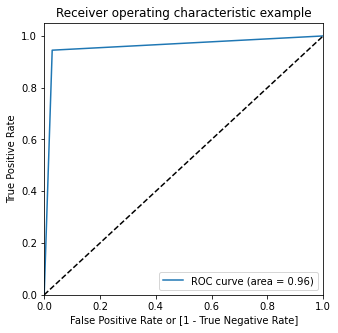

In [90]:
draw_roc(y_test,y_pred)

### Notes

#### 1. Size Of delivery Rejections 
Ans - The data is given for a month, hence for the given monthly data the de rejections are about 6%, and about 0.5% orders being cancelled by swiggy, which leads to bas customer experience
#### 2. Impact Of Delivery Rejections 
Ans - Firstly 0.5% orders are cancelled on a monthly basis, ie 612 orders on a monthly basis, which leads to very bad customer experience, and hence loosing out on Customers. Also the average delivery time is increased by 10 mins, which also to bad customer experience.

#### 3. Cause of Delivery  Rejection
Ans 
1. Distnace seems to be one of the reasons for Delivery rejections. On an average the total distance travelled by the DE was higher for rejected orders. 
2. Also, if the zone of customer and DE varies, DE is more likely to reject the order.
3. New joiners are more likely to reject the orders as compared to DE's who have joined earlier.
4. We need more data to understand if food_time ie, lunch, breakfast, dinner etc have an impact on Rejections

#### Deployment
1. Use - The model can be used to predict how the probability of DE rejecting the Order. Based on the above we need can shortlist a group of DE's more likely to accept the order. The present algorithm used by Swiggy to assign DE can be used on this smaller set of more reliable DE's.
2. Challenges - We need more data to validate the results for all the models.The model uses Difference between last_ping_time and assignment time as a feature. We need to capture these features accurately as the time difference for the feature is of the order seconds. Also what if for a particular Order, the algorithm gives no reliable DE's? Also we need to check if there's any seasonal pattern related to rejected, for some months, the rejects could increase  for some reason.
3. I haven't explored the cancelled orders due to limited time. But we can explore the cancelled orders to reduce the number of cancellations, as these lead to worst customer experience. We can also explore the difference in behaviour of the DE who rejected the order, vs the DE who accepted the same rejected order.


